In [ ]:
#this is for DDPG-mountain
import gym
import numpy as np

from stable_baselines.ddpg.policies import MlpPolicy
from stable_baselines.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise, AdaptiveParamNoiseSpec
from stable_baselines import DDPG

env = gym.make('NoisyMountainCarContinuous-v0')

# the noise objects for DDPG
n_actions = env.action_space.shape[-1]
param_noise = None
action_noise = OrnsteinUhlenbeckActionNoise(mean=np.zeros(n_actions), sigma=float(0.5) * np.ones(n_actions))

model = DDPG(MlpPolicy, env, verbose=1, param_noise=param_noise, action_noise=action_noise,memory_limit=5000,tensorboard_log='D:/DDPG_mountain_Logs')
model.learn(total_timesteps=30000)
#should be 30w steps
model.save("ddpg_mountain")

del model # remove to demonstrate saving and loading

model = DDPG.load("ddpg_mountain")

obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

In [ ]:
#this is for DDPG-pendulum
import gym
import numpy as np

from stable_baselines.ddpg.policies import MlpPolicy
from stable_baselines.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise, AdaptiveParamNoiseSpec
from stable_baselines import DDPG

env = gym.make('NoisyPendulum-v0')

# the noise objects for DDPG
n_actions = env.action_space.shape[-1]
param_noise = None
action_noise = OrnsteinUhlenbeckActionNoise(mean=np.zeros(n_actions), sigma=float(0.5) * np.ones(n_actions))

model = DDPG(MlpPolicy, env, verbose=1, param_noise=param_noise, action_noise=action_noise,memory_limit=50000,tensorboard_log='D:/DDPG_pendulum_Logs')
model.learn(total_timesteps=200000)
model.save("ddpg_pendulum")

del model # remove to demonstrate saving and loading

model = DDPG.load("ddpg_pendulum")

obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

In [ ]:
#this is for SAC-pendulum
#first experiment:gamma=0.99,0.95,0.90,0.85,1
import gym
import numpy as np

from stable_baselines.sac.policies import MlpPolicy
from stable_baselines import SAC

env = gym.make('NoisyPendulum-v0')
model = SAC(MlpPolicy, env, learning_starts=1000,tensorboard_log='D:\Logs',gamma=0.99, learning_rate=0.0003)
model.learn(total_timesteps=30000, log_interval=10)
#model.save("sac_noisypendulum")
del model # remove to demonstrate saving and loading
del env

env = gym.make('NoisyPendulum-v0')
model = SAC(MlpPolicy, env, learning_starts=1000,tensorboard_log='D:\Logs',gamma=0.99, learning_rate=0.001)
model.learn(total_timesteps=30000, log_interval=10)
#model.save("sac_noisypendulum")
del model # remove to demonstrate saving and loading
del env

env = gym.make('NoisyPendulum-v0')
model = SAC(MlpPolicy, env, learning_starts=1000,tensorboard_log='D:\Logs',gamma=0.99, learning_rate=0.003)
model.learn(total_timesteps=30000, log_interval=10)
#model.save("sac_noisypendulum")
del model # remove to demonstrate saving and loading
del env

env = gym.make('NoisyPendulum-v0')
model = SAC(MlpPolicy, env, learning_starts=1000,tensorboard_log='D:\Logs',gamma=0.99, learning_rate=0.0001)
model.learn(total_timesteps=30000, log_interval=10)
#model.save("sac_noisypendulum")
del model # remove to demonstrate saving and loading
del env

env = gym.make('NoisyPendulum-v0')
model = SAC(MlpPolicy, env, learning_starts=1000,tensorboard_log='D:\Logs',gamma=0.99, learning_rate=0.00003)
model.learn(total_timesteps=30000, log_interval=10)
#model.save("sac_noisypendulum")
del model # remove to demonstrate saving and loading
del env

print('finish!')



'''
model = SAC.load("sac_noisypendulum")

obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()
'''

In [ ]:
#this is for SAC-mountain
import gym
import numpy as np

from stable_baselines.sac.policies import MlpPolicy
from stable_baselines import SAC

env = gym.make('NoiseMountainCarContinuous-v0')

model = SAC(MlpPolicy, env, verbose=1,learning_starts=0,learning_rate=0.0003,buffer_size=50000,batch_size=64,ent_coef='auto',train_freq=1,gradient_steps=1,tensorboard_log='D:/SAC_mountain_Logs')
model.learn(total_timesteps=60000, log_interval=10)
model.save("sac_noisymountaion")

del model # remove to demonstrate saving and loading

model = SAC.load("sac_noisymountaion")

obs = env.reset()
while True:
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

In [ ]:
#this is for four-compare
#first experiment:gamma=0.99,0.95,0.90,0.85,1
import gym
import numpy as np

from stable_baselines.sac.policies import MlpPolicy
from stable_baselines import SAC, DDPG

env = gym.make('NoisyPendulum-v0')
model = SAC(MlpPolicy, env, learning_starts=1000,gamma=0.99, learning_rate=0.0003)
model.learn(total_timesteps=300000, log_interval=10)
model.save("sac_pendulum")
del model # remove to demonstrate saving and loading
del env

env = gym.make('MountainCarContinuous-v0')
model = SAC(MlpPolicy, env, verbose=1,learning_starts=0,learning_rate=0.0003,buffer_size=50000,batch_size=64,ent_coef='auto',train_freq=1,gradient_steps=1)
model.learn(total_timesteps=300000, log_interval=10)
model.save("sac_mountaincar")
del model 
del env

from stable_baselines.ddpg.policies import MlpPolicy
from stable_baselines.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise, AdaptiveParamNoiseSpec



env = gym.make('NoisyPendulum-v0')
# the noise objects for DDPG
n_actions = env.action_space.shape[-1]
param_noise = None
action_noise = OrnsteinUhlenbeckActionNoise(mean=np.zeros(n_actions), sigma=float(0.5) * np.ones(n_actions))
model = DDPG(MlpPolicy, env, verbose=1, param_noise=param_noise, action_noise=action_noise,memory_limit=50000)
model.learn(total_timesteps=300000)
model.save("DDPG_pendulum")
del model # remove to demonstrate saving and loading
del env


env = gym.make('MountainCarContinuous-v0')
# the noise objects for DDPG
n_actions = env.action_space.shape[-1]
param_noise = None
action_noise = OrnsteinUhlenbeckActionNoise(mean=np.zeros(n_actions), sigma=float(0.5) * np.ones(n_actions))
model = DDPG(MlpPolicy, env, verbose=1, param_noise=param_noise, action_noise=action_noise,memory_limit=5000)
model.learn(total_timesteps=300000)
model.save("DDPG_mountaincar")
del model # remove to demonstrate saving and loading
del env

print('finish!')

In [ ]:
import gym
import numpy as np

from stable_baselines.sac.policies import MlpPolicy
from stable_baselines import SAC, DDPG

env = gym.make('NoisyPendulum-v0')
model = SAC(MlpPolicy, env, learning_starts=1000,tensorboard_log='D:\Compare_4',gamma=0.99, learning_rate=0.0003)
model.learn(total_timesteps=50000, log_interval=10)
#model.save("sac_noisypendulum")
del model # remove to demonstrate saving and loading
del env

In [24]:
#test well-trained model performance in common scenerio and noisy scenerio 
import gym
import numpy as np
from stable_baselines.ddpg.policies import MlpPolicy
from stable_baselines.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise, AdaptiveParamNoiseSpec
from stable_baselines import SAC, DDPG

acn=[0,0.1,0.2,0.3,0.4,0.5]
obn=[0,0.03,0.06,0.08,0.1,0.12]

env = gym.make('NoisyPendulum-v0')
model=SAC.load("sac_pendulum")
obs = env.reset()

SACpendu_reward=[]
for dd in range(6):
    env.set_noise(acn[dd],obn[dd])
    obs = env.reset()
    sub_reward=[]
    for dd in range(400):
        action, _states = model.predict(obs)
        obs, rewards, dones, info = env.step(action)
        sub_reward.append(rewards)
    SACpendu_reward.append(sub_reward)
SACpendu_total=np.array(SACpendu_reward)

del model

model=DDPG.load("ddpg_pendulum")
obs = env.reset()

DDPGpendu_reward=[]
for dd in range(5):
    env.set_noise(acn[dd],obn[dd])
    obs = env.reset()
    sub_reward=[]
    for dd in range(200):
        action, _states = model.predict(obs)
        obs, rewards, dones, info = env.step(action)
        sub_reward.append(rewards)
    DDPGpendu_reward.append(sub_reward)
DDPGpendu_total=np.array(SACpendu_reward)

print('finish!')

he verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output. Cause: converting <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x00000284F1F6DC88>>: AttributeError: module 'gast' has no attribute 'Num'
finish!


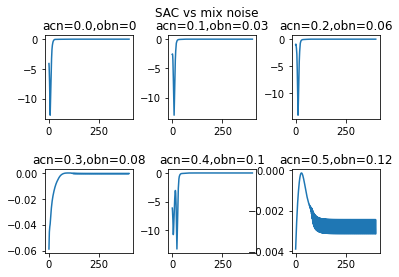

In [26]:
#draw section-SAC
import matplotlib.pyplot as plt
fig=plt.figure()
fig.suptitle("SAC vs mix noise")

sbp1=plt.subplot(2,3,1)
plt.plot(range(400),SACpendu_total[0,:])
sbp1.set_title("acn=0.0,obn=0")

sbp2=plt.subplot(2,3,2)
plt.plot(range(400),SACpendu_total[1,:])
sbp2.set_title("acn=0.1,obn=0.03")

sbp3=plt.subplot(2,3,3)
plt.plot(range(400),SACpendu_total[2,:])
sbp3.set_title("acn=0.2,obn=0.06")

sbp4=plt.subplot(2,3,4)
plt.plot(range(400),SACpendu_total[3,:])
sbp4.set_title("acn=0.3,obn=0.08")

sbp5=plt.subplot(2,3,5)
plt.plot(range(400),SACpendu_total[4,:])
sbp5.set_title("acn=0.4,obn=0.1")

sbp5=plt.subplot(2,3,6)
plt.plot(range(400),SACpendu_total[5,:])
sbp5.set_title("acn=0.5,obn=0.12")

plt.subplots_adjust(hspace=0.6,wspace=0.4)
plt.show()

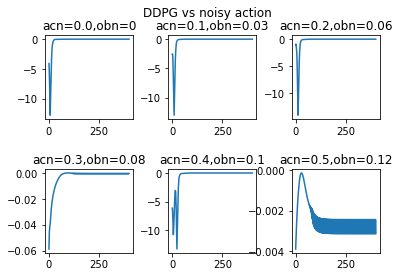

In [27]:
#draw section-DDPG
import matplotlib.pyplot as plt
fig=plt.figure()
fig.suptitle("DDPG vs noisy action")

sbp1=plt.subplot(2,3,1)
plt.plot(range(400),DDPGpendu_total[0,:])
sbp1.set_title("acn=0.0,obn=0")

sbp2=plt.subplot(2,3,2)
plt.plot(range(400),DDPGpendu_total[1,:])
sbp2.set_title("acn=0.1,obn=0.03")

sbp3=plt.subplot(2,3,3)
plt.plot(range(400),DDPGpendu_total[2,:])
sbp3.set_title("acn=0.2,obn=0.06")

sbp4=plt.subplot(2,3,4)
plt.plot(range(400),DDPGpendu_total[3,:])
sbp4.set_title("acn=0.3,obn=0.08")

sbp5=plt.subplot(2,3,5)
plt.plot(range(400),DDPGpendu_total[4,:])
sbp5.set_title("acn=0.4,obn=0.1")

sbp5=plt.subplot(2,3,6)
plt.plot(range(400),DDPGpendu_total[5,:])
sbp5.set_title("acn=0.5,obn=0.12")

plt.subplots_adjust(hspace=0.6,wspace=0.4)
plt.show()